In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits=load_digits()
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

# Задача 1

In [214]:
from scipy.cluster.vq import kmeans
import numpy as np

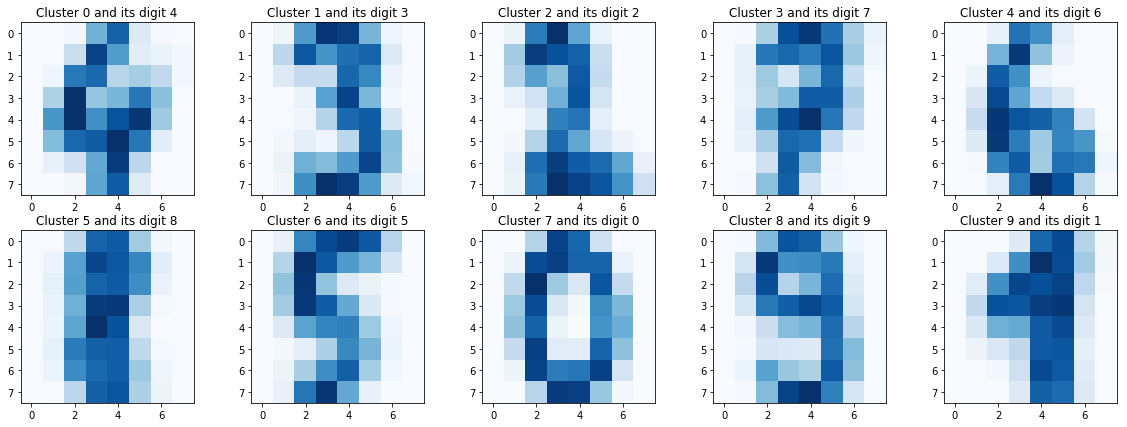

In [215]:
k=10
digits1=digits.images.reshape(1797, -1)
centroids, distortion=kmeans(digits1,k)
digits1 = np.expand_dims(digits1, axis = 1)
labels = np.argmin(((digits1-centroids) ** 2).sum(axis = 2), axis = 1)#к какому кластеру относится нарисованная цифра
plt.figure(figsize=(20,7))
for i in range(k):
    mask=labels==i
    plt.subplot(2,5,i+1)
    plt.title("Cluster {} and its digit {}".format(i, np.argmax(np.bincount(digits.target[mask]))))
    plt.imshow(centroids[i].reshape(8,8), cmap="Blues")

# Задача 2


In [289]:
def error(digits, labels, i):
    return ((labels==i).sum()-np.max(np.bincount(digits.target[labels==i])))/(labels==i).sum()
for i in range(10):
    print("Error in cluster ", i, "is", error(digits, labels, i))

Error in cluster  0 is 0.018072289156626505
Error in cluster  1 is 0.13966480446927373
Error in cluster  2 is 0.15428571428571428
Error in cluster  3 is 0.1407766990291262
Error in cluster  4 is 0.027472527472527472
Error in cluster  5 is 0.5535714285714286
Error in cluster  6 is 0.08108108108108109
Error in cluster  7 is 0.0111731843575419
Error in cluster  8 is 0.43951612903225806
Error in cluster  9 is 0.3888888888888889


# Задача 3

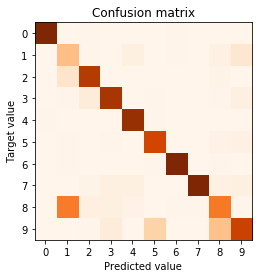

In [280]:
clusters=[]#преобладающая цифра в классе
for i in range(10):
    clusters.append(np.argmax(np.bincount(digits.target[labels==i])))
digits_pred=[]#предсказанная цифра
for i in range(digits.target.shape[0]):
    digits_pred.append(clusters[labels[i]])
digits_pred=np.array(digits_pred)
conf=np.array([[((digits.target==i) * (digits_pred==j)).sum() for i in range(10)] for j in range(10)])
plt.imshow(conf, cmap='Oranges')
plt.xticks(range(10))
plt.yticks(range(10))
plt.title("Confusion matrix")
plt.ylabel("Target value")
plt.xlabel("Predicted value")
plt.show()

Можно сделать вывод, что плохо кластеризуются 1,5,8,9, а остальные с хорошей точностью

# Задача 4

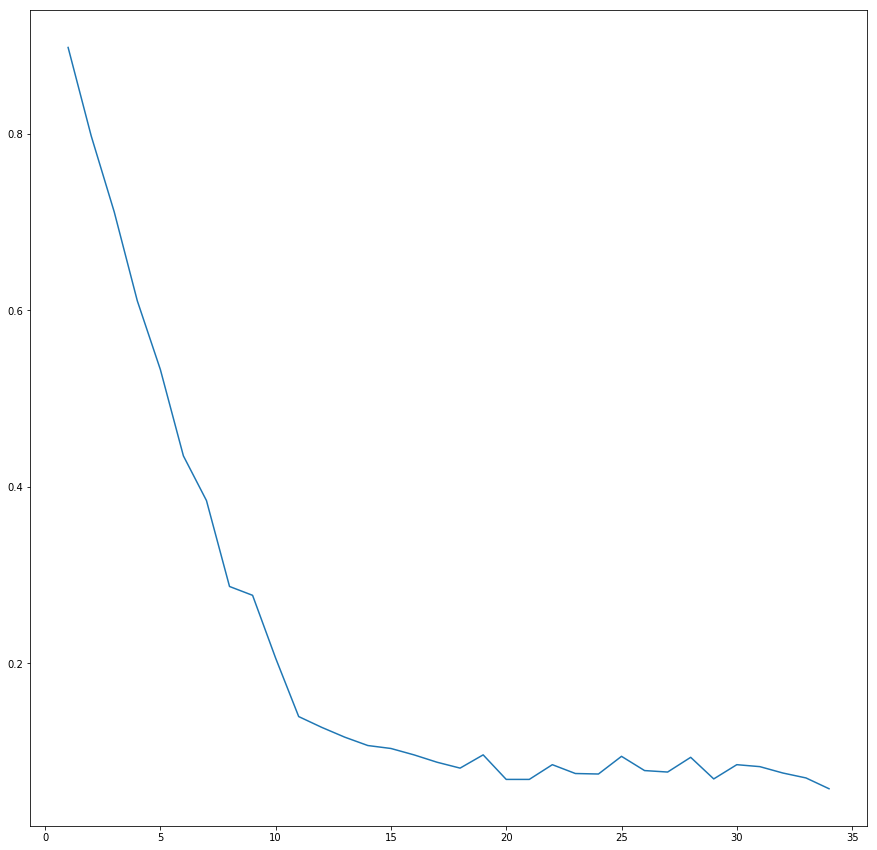

In [293]:
def pred(k):
    clusters=[]#преобладающая цифра в классе
    digits_pred=[]#предсказанная цифра
    digits1=digits.images.reshape(1797, -1)
    centroids=kmeans(digits1,k)[0]
    digits1 = np.expand_dims(digits1, axis = 1)
    labels = np.argmin(((digits1-centroids) ** 2).sum(axis = 2), axis = 1)#к какому кластеру относится нарисованная цифра
    for i in range(k):
        clusters.append(np.argmax(np.bincount(digits.target[labels==i])))
    for i in range(digits.target.shape[0]):
        digits_pred.append(clusters[labels[i]])
    return digits_pred, clusters,centroids
errors=[(digits.target!=pred(i)[0]).sum()/len(digits.target) for i in range(1,35)]
plt.figure(figsize=(15,15))
plt.plot(range(1,35), errors)

На мой взгляд, оптимально будет выбрать k=20,так как далее мняется мало

# Задача 5

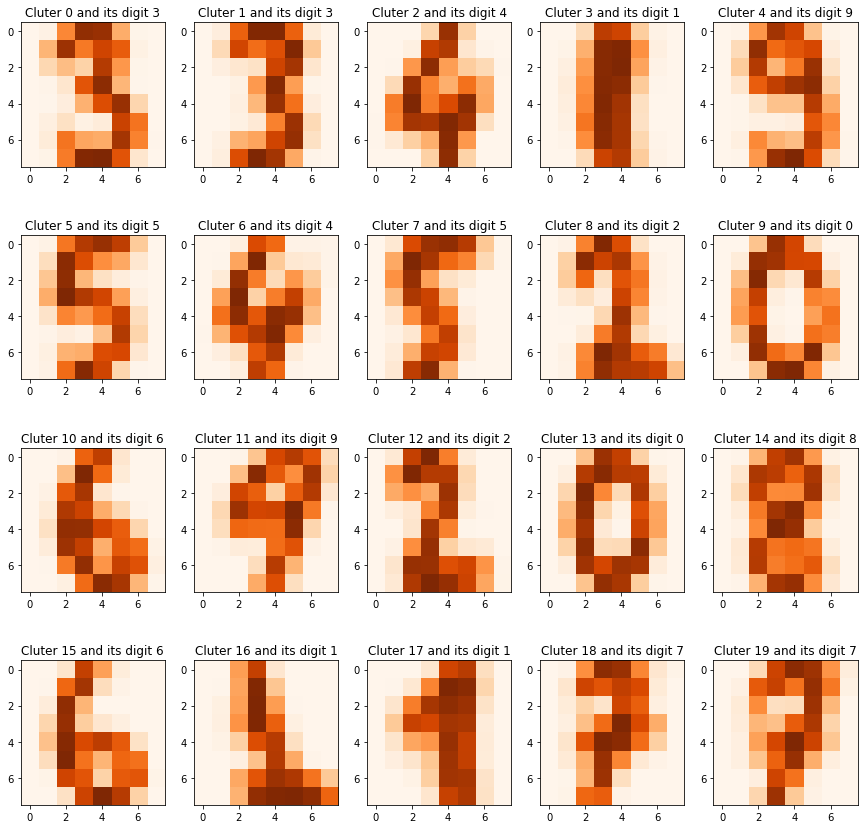

In [292]:
digits_pred, clusters,centroids=pred(20)
plt.figure(figsize=(15,15))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.title('Cluter {} and its digit {}'.format(i, clusters[i]))
    plt.imshow(centroids[i].reshape((8, 8)), cmap='Oranges')

Цифре 1 соответствует 3 кластера, цифрам 3,2,4,5,6,7,9- 2, цифре 8-1

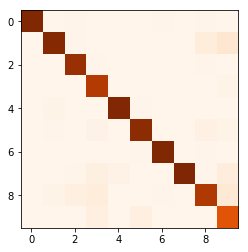

In [294]:
digits_pred=pred(20)[0]
digits_pred=np.array(digits_pred)
conf=np.array([[((digits.target==i) * (digits_pred==j)).sum() for i in range(10)] for j in range(10)])
plt.imshow(conf, cmap='Oranges')

Точность заметно выросла, разбиение более конкретное, без значительных ошибок